In [6]:
# load the liberies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read the files
df=pd.read_csv("Fish_dataset.csv")

In [8]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [11]:
df.size

1113

In [12]:
df.shape

(159, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [14]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [15]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

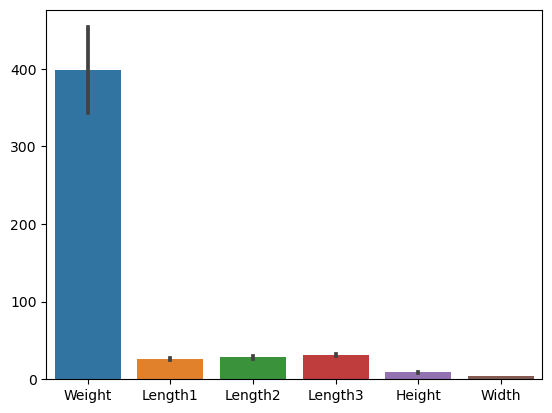

In [16]:
# Q1. Plot a bar chart showing the count of individual species?
sns.barplot(df)

<Axes: >

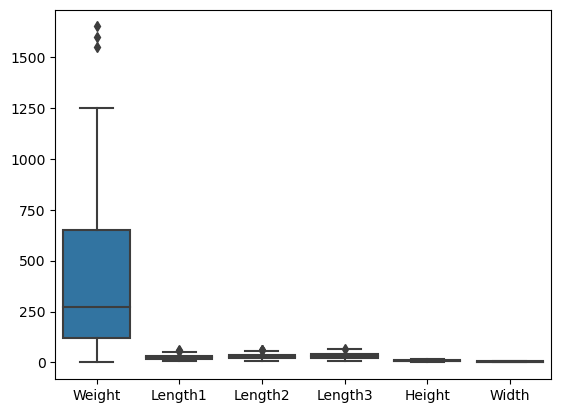

In [17]:
# Q2. Identify outliers and remove if any?
sns.boxplot(df)

In [18]:
for x in df.columns[::]:
    if df[x].dtype==object:
        continue
    else:
        q1=df[x].quantile(q=0.25)
        q3=df[x].quantile(q=0.75)
        IQR= q3-q1
        
        low=q1-1.5*IQR
        high=q3+1.5*IQR
        df.loc[(df[x]<low)| (df[x]>high),x]=df[x].median()

<Axes: >

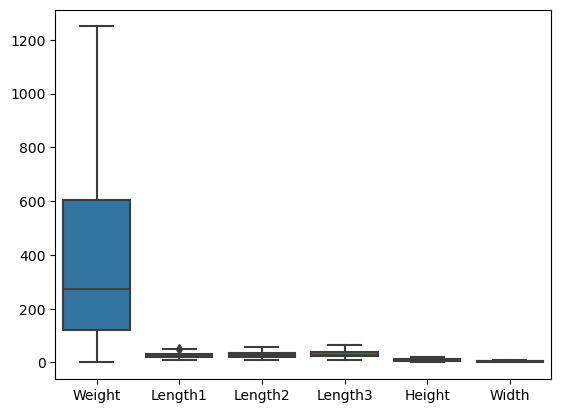

In [19]:
sns.boxplot(df)

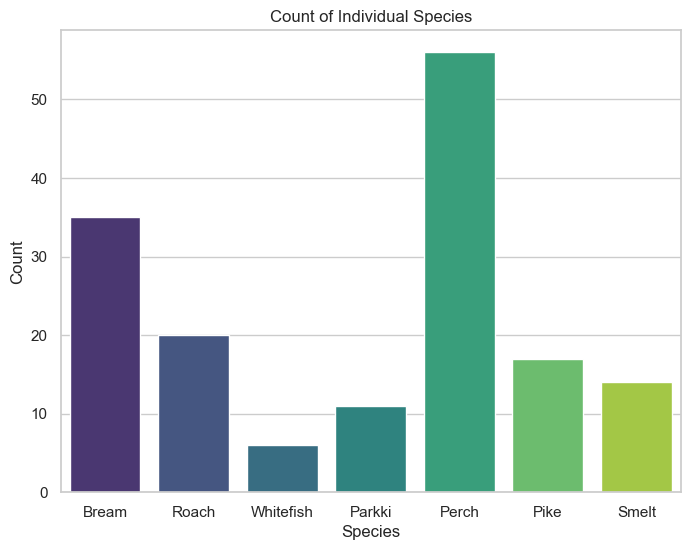

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'species' is the column in your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title('Count of Individual Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [21]:
df.corr()

C:\Users\dekit\AppData\Local\Temp\ipykernel_17868\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895156,0.899167,0.843011,0.799031,0.898463
Length1,0.895156,1.000000,0.999418,0.932271,0.675585,0.872316
Length2,0.899167,0.999418,1.000000,0.934579,0.691202,0.878628
Length3,0.843011,0.932271,0.934579,1.000000,0.717631,0.868443
Height,0.799031,0.675585,0.691202,0.717631,1.000000,0.792881
Width,0.898463,0.872316,0.878628,0.868443,0.792881,1.000000


Build a regression model and print a regression equation?

STANDARDIZATION 

In [22]:
x=df['Species']

In [23]:
df1=pd.get_dummies(x)

In [24]:
df=pd.concat([df,df1],axis=1)

In [25]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [37]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [38]:
df.size

2067

In [26]:
df.drop(['Species'],inplace=True,axis=1)

In [27]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,1.000000,0.895156,0.899167,0.843011,0.799031,0.898463,0.411386,-0.188597,0.020898,0.121877,-0.265733,-0.356285,0.098894
Length1,0.895156,1.000000,0.999418,0.932271,0.675585,0.872316,0.274864,-0.209513,0.007251,0.431045,-0.210723,-0.496577,0.069339
Length2,0.899167,0.999418,1.000000,0.934579,0.691202,0.878628,0.292935,-0.209550,0.008808,0.419917,-0.215863,-0.509558,0.072489
Length3,0.843011,0.932271,0.934579,1.000000,0.717631,0.868443,0.349647,-0.199465,-0.093027,0.477756,-0.203718,-0.498022,0.058928
Height,0.799031,0.675585,0.691202,0.717631,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.898463,0.872316,0.878628,0.868443,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Bream,0.411386,0.274864,0.292935,0.349647,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Parkki,-0.188597,-0.209513,-0.209550,-0.199465,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Perch,0.020898,0.007251,0.008808,-0.093027,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Pike,0.121877,0.431045,0.419917,0.477756,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


In [28]:
# step 1: decide of x & y Values
x=df[['Length1','Length2','Length3','Height','Width']]
y=df['Weight']

In [29]:
# step 2: import the train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
# step 3: import the model
from sklearn.linear_model import LinearRegression

In [31]:
# step 4:instantiate the model
model = LinearRegression()

In [32]:
# step 5:fit the model with train data
model.fit(X_train,y_train)

LinearRegression()

In [33]:
# step 6:model.predicted
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

In [34]:
# step 7:import the metrice with r2_score
from sklearn.metrics import r2_score

In [35]:
train=r2_score(y_train,y_train_pred)
test=r2_score(y_test,y_test_pred)

In [36]:
print('R2_train= ',train,'\nR2_test= ',test)

R2_train=  0.8939986038097781 
R2_test=  0.8870944096535753


#### USING LASSO  REGRESSION MODEL

In [54]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [55]:
lasso_reg.score(X_test,y_test)

0.6185913831522901

In [56]:
lasso_reg.score(X_train,y_train)

0.7352960470600087

### USING RIDGE

In [57]:
from sklearn.linear_model import Ridge
ridge_reg=Lasso()
ridge_reg.fit(X_train,y_train)

Lasso()

In [59]:
ridge_reg.score(X_test,y_test)

0.6185913831522901

In [61]:
ridge_reg.score(X_train,y_train)

0.7352960470600087

### ElasticNet

In [63]:
from sklearn.linear_model import ElasticNet
en_reg=ElasticNet()
en_reg.fit(X_train,y_train)

ElasticNet()

In [64]:
en_reg.score(X_test,y_test)

0.6202773507227679

In [65]:
en_reg.score(X_train,y_train)

0.7352798135440555

In [44]:
# simple model
x=df['Length3'].values.reshape(-1,1)
y=df['Weight']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score

In [51]:
train=r2_score(y_train,y_train_pred)
test=r2_score(y_test,y_test_pred)

In [52]:
print('R2_train= ',train,'\nR2_test= ',test)

R2_train=  0.7352961428680678 
R2_test=  0.6184498014132611
